# DIABETES PREDICTION

In [1]:
import numpy as np
import pandas as pd

In [4]:
dataset = pd.read_csv("diabetes.csv")
dataset.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Spliting data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 25,random_state = 0)

## Applying classifiers and evaluation

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
acc_logreg2 = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy : ",acc_logreg2)

Accuracy :  88.0


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg1 = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy : ",acc_logreg1)

Accuracy :  96.0


## K Neighbor classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred,y_test), 2) * 100
print("Accuracy :" ,acc_knn)

Accuracy : 84.0


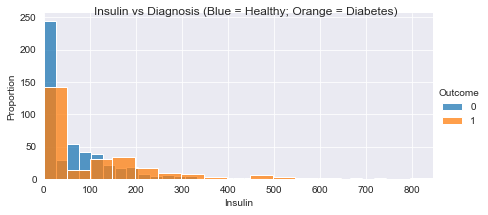

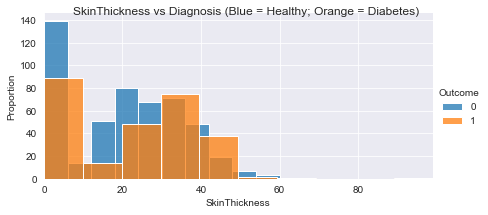

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def plotHistogram(values,label,feature,title):
    sns.set_style("darkgrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.histplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(dataset,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(dataset,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

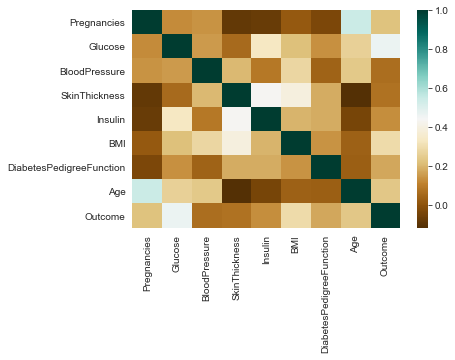

In [21]:
g = sns.heatmap(dataset.corr(),cmap="BrBG",annot=False)